# **New York City Motor Vehicle Collisions - Crashes dataset between January 1, 2021 to December 31, 2022**
## Comparing accidents for 2021(Jan-Dec) and 2022(Jan-Dec)
## Timothy Yip


### The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage. The data is preliminary and subject to change when the MV-104AN forms are amended based on revised crash details.


### For each year I answered the questions below:

1. How many accident happened?
   
2. Which Borough had the most/least accidents?
   
3. Which time of day had the most/least accidents?
   
4. Which day of the week had the most/least accidents?
  
5. Which month had the most/least accidents?
    
6. How many accidents resulted in a death?
   
7. Which month had the most/least amount of death?
    
8. Which day of the week had the most/least amount of death?
    
9. Which time of the day had the most/least amount of death?
  
10. How many people were injured per year?
    
11. Which month had the most/least amount of injuries?

12. Which day of the week had the most/least amounf of injuries?

13. Which hour of the day had the most/least amount of injuries?

# **Sources and Additional Infomation**

[NYC Motor Vehicle Collisions - Crashes (NYC Open Data)](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

[Vision Zero(Updated Monthly)](https://vzv.nyc/)

[NYPD Traffic Data(Updated Weekly)](https://www.nyc.gov/site/nypd/stats/traffic-data/traffic-data-collision.page)

[NYPD Traffic Fatalities(Updated Weekly)](https://www.nyc.gov/site/nypd/stats/traffic-data/traffic-fatalities.page)

[NYPD Vehicles & Property Infomation](https://www.nyc.gov/site/nypd/services/vehicles-property/vehicles-property-landing.page)

[NYS MV104-AN](https://dmv.ny.gov/files/mv104pdf)

<img src="Images/MV104.png" width=500 height=500 align="center"/>

## **Libraries I used for my analysis**
#### Pandas, Matplotlib, Seaborn, Folium and Datetime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import plotly.express as px
import datetime as dt
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = 0.5, rc={"grid.linewidth": 1.0})
%matplotlib inline


## **Importing, reading, cleaning and reviewing the dataset from NYC Open Data**

In [2]:
mvc=pd.read_csv('Data/Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\aznxk\AppData\Local\Temp\ipykernel_8412\2875153676.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mvc=pd.read_csv('Data/Motor_Vehicle_Collisions_-_Crashes.csv')


##### Looking at the Top 5 Rows of the data

In [3]:
mvc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


#### Looking at the Bottom 5 Rows of the data

In [4]:
mvc.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1977317,03/16/2023,8:00,BROOKLYN,11218.0,40.641537,-73.98245,"(40.641537, -73.98245)",CHURCH AVENUE,CHESTER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4613758,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1977318,03/16/2023,17:17,NaN,NaN,NaN,NaN,NaN,MAIN STREET,HORACE HARDING EXPRESSWAY,NaN,...,Aggressive Driving/Road Rage,NaN,NaN,NaN,4613686,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1977319,03/17/2023,17:34,NaN,NaN,40.715927,-73.80889,"(40.715927, -73.80889)",GRAND CENTRAL PKWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4613570,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1977320,03/16/2023,15:40,BROOKLYN,11206.0,40.709820,-73.94020,"(40.70982, -73.9402)",BUSHWICK AVENUE,STAGG STREET,NaN,...,Unspecified,NaN,NaN,NaN,4613436,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1977321,03/15/2023,15:43,NaN,NaN,40.836617,-73.87377,"(40.836617, -73.87377)",BRONX RIVER PARKWAY,NaN,NaN,...,Other Vehicular,NaN,NaN,NaN,4613173,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


#### Calculating all the Null Values in my dataframe

In [5]:
mvc.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           614765
ZIP CODE                          615002
LATITUDE                          226416
LONGITUDE                         226416
LOCATION                          226416
ON STREET NAME                    413225
CROSS STREET NAME                 734171
OFF STREET NAME                  1656468
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6119
CONTRIBUTING FACTOR VEHICLE 2     299000
CONTRIBUTING FACTOR VEHICLE 3    1838064
CONTRIBUTING FACTOR VEHICLE 4    1946217
CONTRIBUTING FACTOR VEHICLE 5    1968951
COLLISION_ID                           0
VEHICLE TYPE COD

#### Dropping all Unnecessary Columns for my analysis  

In [6]:
drop_cols=['CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 
           'VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5','NUMBER OF PEDESTRIANS INJURED',
           'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED','CONTRIBUTING FACTOR VEHICLE 5'  ]
mvc.drop(drop_cols, inplace=True, axis=1)
mvc

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,Aggressive Driving/Road Rage
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,Pavement Slippery
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,Following Too Closely
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,Unspecified
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977317,03/16/2023,8:00,BROOKLYN,11218.0,40.641537,-73.982450,"(40.641537, -73.98245)",CHURCH AVENUE,CHESTER AVENUE,NaN,0.0,0.0,0,Unspecified
1977318,03/16/2023,17:17,NaN,NaN,NaN,NaN,NaN,MAIN STREET,HORACE HARDING EXPRESSWAY,NaN,0.0,0.0,0,Aggressive Driving/Road Rage
1977319,03/17/2023,17:34,NaN,NaN,40.715927,-73.808890,"(40.715927, -73.80889)",GRAND CENTRAL PKWY,NaN,NaN,1.0,0.0,0,Following Too Closely
1977320,03/16/2023,15:40,BROOKLYN,11206.0,40.709820,-73.940200,"(40.70982, -73.9402)",BUSHWICK AVENUE,STAGG STREET,NaN,0.0,0.0,0,Oversized Vehicle


#### Looking at all the Columns in my dataframe

In [7]:
mvc.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1'],
      dtype='object')

#### Looking at all the Columns types

In [8]:
mvc.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
dtype: object

#### Converting Crash Date in to datetime. Created new columns for the Hour, Month and Day of the Week for the crash

In [9]:
mvc['CRASH DATE']= pd.to_datetime(mvc['CRASH DATE'])
#mvc['CRASH TIME']= mvc['CRASH TIME'].dt.strptime(mvc['CRASH TIME'],'%H:%M').time()
#mvc['CRASH TIME']= pd.to_datetime(mvc['CRASH TIME'], format='%H:%M')
#mvc['CRASH TIME'] = mvc['CRASH TIME'].dt.time()
mvc['CRASH HOUR'] = pd.to_datetime(mvc['CRASH TIME']).dt.hour
mvc['CRASH MONTH']= mvc['CRASH DATE'].dt.strftime('%B')
mvc['CRASH DoW']= mvc['CRASH DATE'].dt.strftime('%A')
mvc['CRASH YEAR']= mvc['CRASH DATE'].dt.strftime('%Y').astype(int)
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977322 entries, 0 to 1977321
Data columns (total 18 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF MOTORIST KILLED      int64         
 13  CONTRIBUTING FACTOR VEHICLE 1  object        
 14  CRASH HOUR                     int64         
 15  CRASH MONTH    

In [10]:
##### Looking at the Top 5 Rows of the data to make sure the new columns were added

In [11]:
mvc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CRASH HOUR,CRASH MONTH,CRASH DoW,CRASH YEAR
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,Aggressive Driving/Road Rage,2,September,Saturday,2021
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,Pavement Slippery,11,March,Saturday,2022
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,Following Too Closely,6,June,Wednesday,2022
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,Unspecified,9,September,Saturday,2021
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,NaN,8,December,Tuesday,2021


## **Creating a new dataframe to work with.**
#### This dataframe is looking at crashes between January 1, 2021 to Decemeber 31, 2022

In [12]:
start_date ='01/01/2021'
end_date = '12/31/2022'
mvc2022 = mvc[(mvc['CRASH DATE'] >= start_date) & (mvc['CRASH DATE'] <= end_date)]
mvc2022

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CRASH HOUR,CRASH MONTH,CRASH DoW,CRASH YEAR
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,Aggressive Driving/Road Rage,2,September,Saturday,2021
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,Pavement Slippery,11,March,Saturday,2022
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,Following Too Closely,6,June,Wednesday,2022
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,Unspecified,9,September,Saturday,2021
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,NaN,8,December,Tuesday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975605,2022-12-20,10:50,QUEENS,11433.0,40.703796,-73.797650,"(40.703796, -73.79765)",NaN,NaN,92-31 UNION HALL STREET,0.0,0.0,0,Driver Inattention/Distraction,10,December,Tuesday,2022
1976363,2022-12-03,14:35,NaN,NaN,40.712223,-73.806500,"(40.712223, -73.8065)",PARSONS BOULEVARD,85 AVENUE,NaN,0.0,0.0,0,Unspecified,14,December,Saturday,2022
1976700,2022-03-18,0:25,NaN,NaN,40.845222,-73.866130,"(40.845222, -73.86613)",WHITE PLAINS ROAD,NaN,NaN,0.0,0.0,0,Turning Improperly,0,March,Friday,2022
1976871,2022-03-19,8:30,BROOKLYN,11234.0,40.621857,-73.915596,"(40.621857, -73.915596)",NaN,NaN,1325 EAST 66 STREET,0.0,0.0,0,Driverless/Runaway Vehicle,8,March,Saturday,2022


#### Calculating all the Null Values in the dataframe

In [13]:
mvc2022.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                           73386
ZIP CODE                          73412
LATITUDE                          17723
LONGITUDE                         17723
LOCATION                          17723
ON STREET NAME                    58055
CROSS STREET NAME                114513
OFF STREET NAME                  156258
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      1124
CRASH HOUR                            0
CRASH MONTH                           0
CRASH DoW                             0
CRASH YEAR                            0
dtype: int64

In [14]:
mvc2022.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CRASH HOUR', 'CRASH MONTH',
       'CRASH DoW', 'CRASH YEAR'],
      dtype='object')

# **Visualization and Tables**

## **Number of Crashes**

### **1. Number of Crashes per Year**


In [15]:
mvc2022crash = mvc2022.groupby(['CRASH YEAR'])['CRASH YEAR'].count()
mvc2022crash

CRASH YEAR
2021    110546
2022    103764
Name: CRASH YEAR, dtype: int64

### **2. Number of Crashes by Borough**
##### Missing borough data makes it inconclusive to say which borough had the most accident. But with the overall data Brooklyn had the most and Staten Island the least

In [16]:
mvc2022['BOROUGH'].unique()

array([nan, 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [17]:
null_counts = mvc2022.groupby('CRASH YEAR')['BOROUGH'].apply(lambda x: x.isnull().sum())
null_counts

CRASH YEAR
2021    38332
2022    35054
Name: BOROUGH, dtype: int64

In [18]:
mvcpivot = mvc2022.pivot_table(index = ['CRASH YEAR'], columns= ['BOROUGH'], values = ['CRASH DoW'], aggfunc = 'count')
mvcpivot = pd.concat([mvcpivot, null_counts.rename('Not Listed')], axis=1)
mvcpivot

,"(CRASH DoW, BRONX)","(CRASH DoW, BROOKLYN)","(CRASH DoW, MANHATTAN)","(CRASH DoW, QUEENS)","(CRASH DoW, STATEN ISLAND)",Not Listed
CRASH YEAR,,,,,,
2021,13389,25169,11429,19562,2665,38332
2022,12277,23335,11960,18419,2719,35054


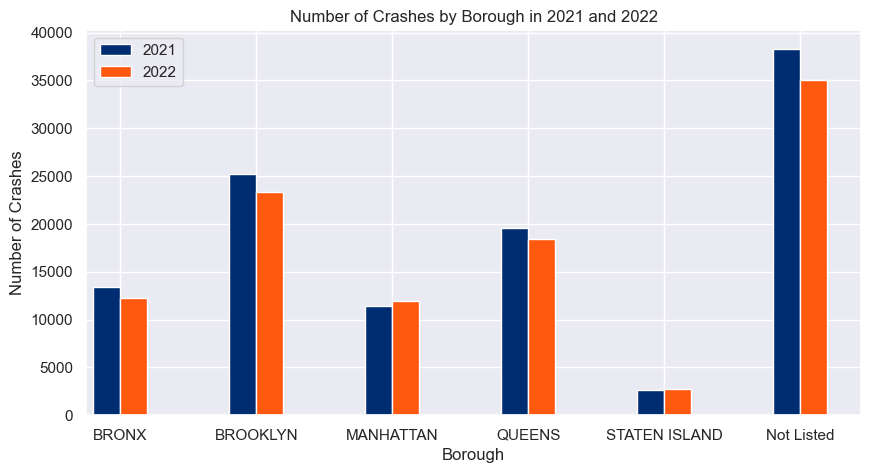

In [19]:
sns.set(rc={'figure.figsize': (10,5)})
mvcpivot_filtered = mvcpivot.loc[[2021, 2022]]
fig, ax = plt.subplots()
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
fig, ax.set_xticklabels(['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','Not Listed'])
plt.title('Number of Crashes by Borough in 2021 and 2022')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.legend(['2021', '2022'])
plt.show()

###  **3. Number of Crashes during the time of the day**
##### NYC Rush Hour occurs between 730-930a and from 5-7p.
##### Most accidents occur during the even rush hour time between 2p and 6p. During the morning rush hour 8a has the high amount of accidents.
##### Least amount of accidents occurs early in the morning between 1a-5a.

In [20]:
mvc2022hours=mvc2022.pivot_table(index= 'CRASH YEAR',columns = 'CRASH HOUR', values = 'CRASH DoW', aggfunc = ('count'))
pd.set_option('display.max_columns', None)
mvc2022hours

CRASH HOUR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
CRASH YEAR,,,,,,,,,,,,,,,,,,,,,,,,
2021,5104,2717,2112,1816,1853,2021,2813,3508,5112,4865,4819,5289,5655,5892,6646,6788,7148,7026,6370,5539,4884,4436,4261,3872
2022,4634,2460,2112,2044,2222,2159,2875,3737,5552,4681,4598,4699,5060,5048,5925,6418,6445,6526,5921,5007,4319,3941,3824,3557


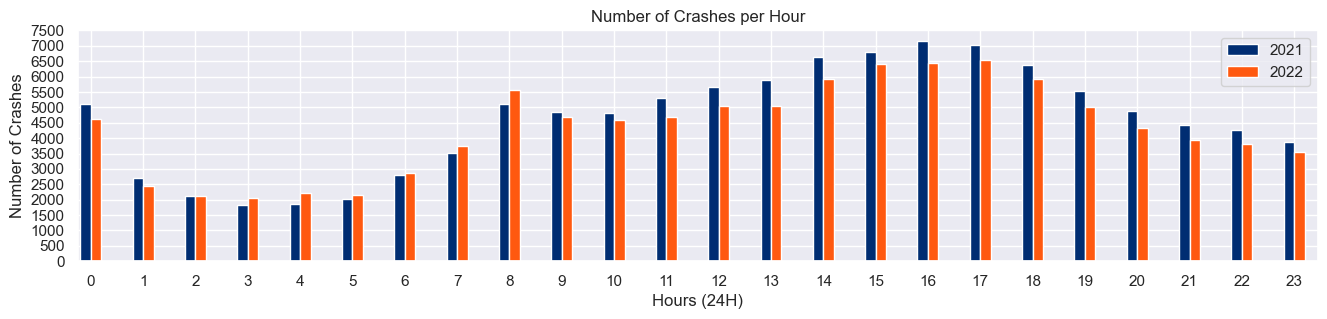

In [21]:
sns.set(rc={'figure.figsize': (16,3)})

mvcpivot_filtered = mvc2022hours.loc[[2021, 2022]]
fig, ax = plt.subplots()
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xticks(range(0,24))
ax.set_yticks(range(0,8000,500))
plt.xlabel('Hours (24H)')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes per Hour')
plt.legend()
plt.show()

### **4. Number of Crash per Day of the Week**
##### Friday has the highest amount of crashes.
##### Monday has the lowest amount of crashes.

In [22]:
dow_order= ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
mvc2022dow=mvc2022.pivot_table(index= 'CRASH YEAR', columns = 'CRASH DoW', values = 'CRASH MONTH', aggfunc = ('count'))
mvc2022dow = mvc2022dow.reindex(columns=dow_order)
mvc2022dow

CRASH DoW,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
CRASH YEAR,,,,,,,
2021,14290,15567,15672,15792,16075,17479,15671
2022,13551,14342,14526,14778,15048,16398,15121


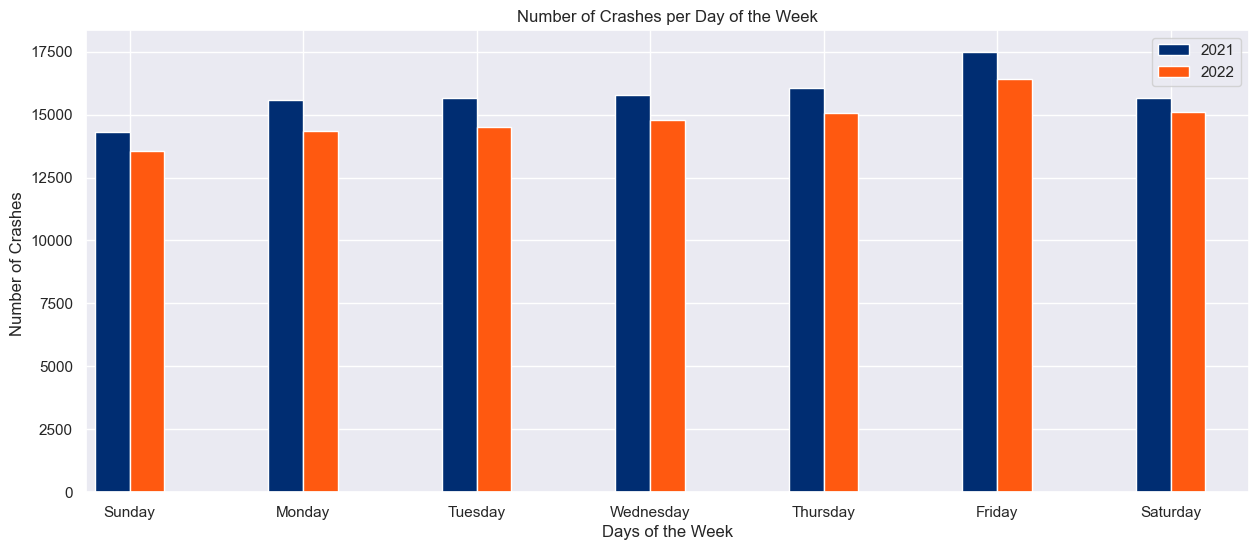

In [23]:
sns.set(rc={'figure.figsize': (15,6)})
mvcpivot_filtered = mvc2022dow.loc[[2021, 2022]]
fig, ax = plt.subplots()
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Days of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Crashes ')
plt.title('Number of Crashes per Day of the Week')
plt.legend()
plt.show()

### **5. Number of Crashes per Month**
##### In 2021 May, June August September and October had close to 10000 accidents.
##### In 2022 May and June had the most accidents at over 9400.
##### Both years February had the least amount of accidents

In [24]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mvc2022month = pd.pivot_table(data=mvc2022, index='CRASH YEAR', columns='CRASH MONTH', values='CRASH DoW', aggfunc='count')
mvc2022month = mvc2022month.reindex(columns=month_order)
mvc2022month

CRASH MONTH,January,February,March,April,May,June,July,August,September,October,November,December
CRASH YEAR,,,,,,,,,,,,
2021,7719,6976,8262,8752,10289,10608,10002,9880,9896,10204,9375,8583
2022,7915,7390,8853,8544,9459,9471,8870,8921,8873,8941,8165,8362


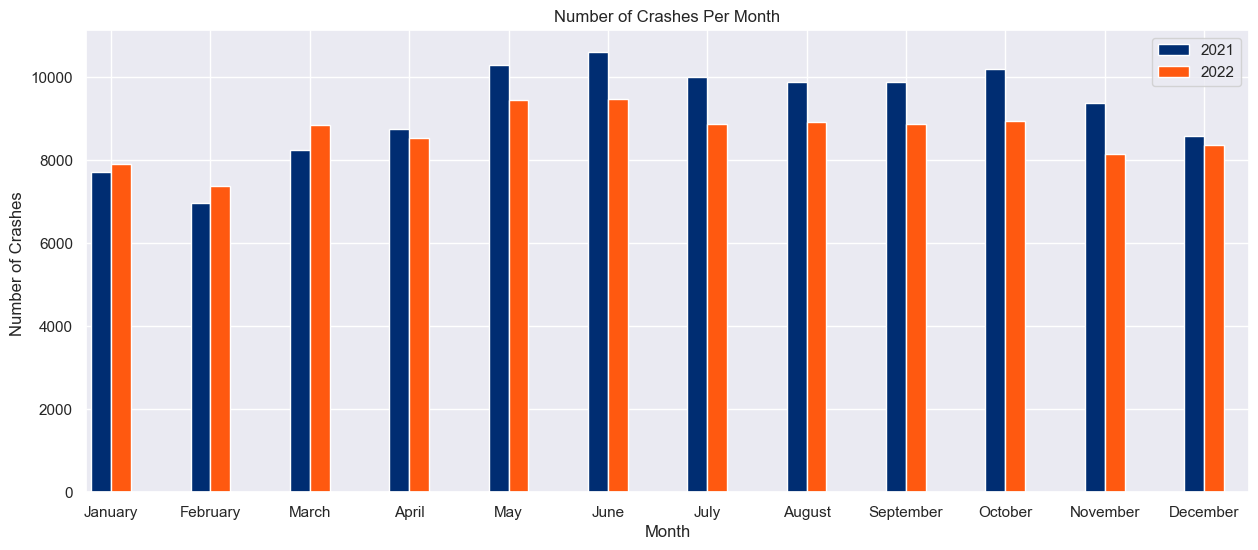

In [25]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022month.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of Crashes ')
plt.title('Number of Crashes Per Month')
plt.legend()
plt.show()


## **Death by the Numbers**

### **6. Number of Death per Year**


In [26]:
mvc2022deathyear=mvc2022.pivot_table(index= 'CRASH YEAR', values = 'NUMBER OF PERSONS KILLED', aggfunc = ('sum'))
mvc2022deathyear

,NUMBER OF PERSONS KILLED
CRASH YEAR,
2021,294.0
2022,285.0


### **7. Number of Death per Month**
##### May and October 2021 had the most death at 33 each.
##### July 2022 had the most at 39.
##### February 2021 had the least amount of death at 12.
##### September 2022 had the last amount of death at 16.

In [27]:
mvc2022deathmonth=mvc2022.pivot_table(index= ['CRASH YEAR'],columns='CRASH MONTH', values='NUMBER OF PERSONS KILLED', aggfunc='sum')
mvc2022deathmonth = mvc2022deathmonth.reindex(columns=month_order)
mvc2022deathmonth


CRASH MONTH,January,February,March,April,May,June,July,August,September,October,November,December
CRASH YEAR,,,,,,,,,,,,
2021,17.0,12.0,18.0,27.0,33.0,27.0,29.0,27.0,25.0,33.0,24.0,22.0
2022,21.0,26.0,16.0,10.0,27.0,24.0,39.0,26.0,16.0,26.0,28.0,26.0


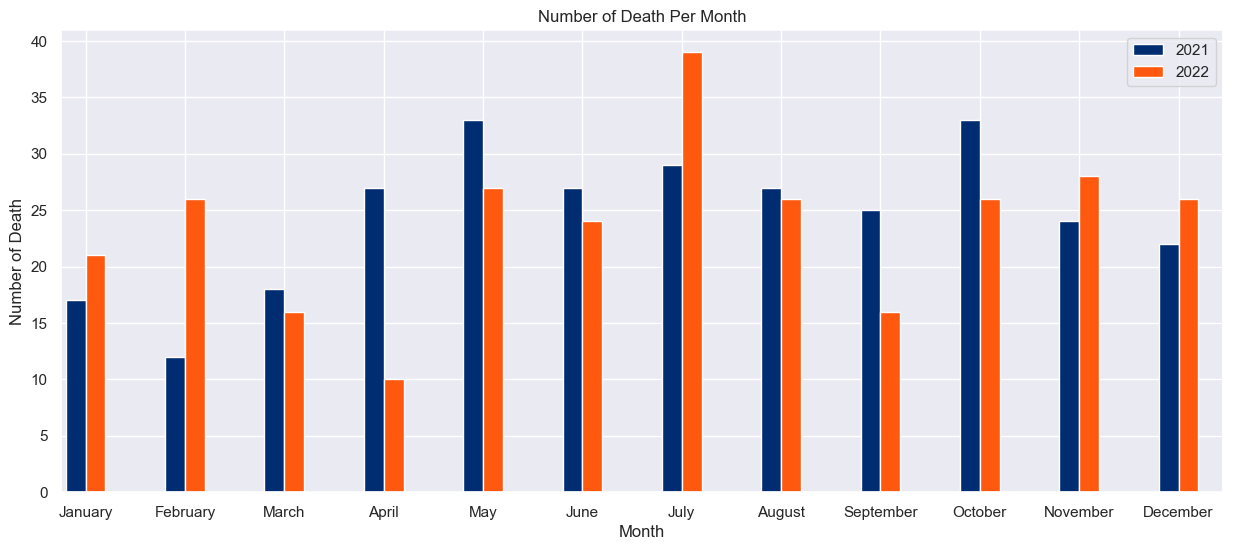

In [28]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022deathmonth.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Death')
plt.title('Number of Death Per Month')
plt.legend()
plt.show()

##### **Fatality Rate per Month**

In [29]:
crash_data_pivot = pd.pivot_table(mvc2022, index='CRASH YEAR', columns='CRASH MONTH', values=['CRASH DATE', 'NUMBER OF PERSONS KILLED'], aggfunc={'CRASH DATE': 'count', 'NUMBER OF PERSONS KILLED': 'sum'})
crash_data_pivot
fatality_ratemonth = (crash_data_pivot['NUMBER OF PERSONS KILLED'] / crash_data_pivot['CRASH DATE'])*100
fatality_ratemonth

CRASH MONTH,April,August,December,February,January,July,June,March,May,November,October,September
CRASH YEAR,,,,,,,,,,,,
2021,0.308501,0.273279,0.256321,0.172018,0.220236,0.289942,0.254525,0.217865,0.320731,0.256000,0.323403,0.252627
2022,0.117041,0.291447,0.310930,0.351827,0.265319,0.439684,0.253405,0.180730,0.285442,0.342927,0.290795,0.180322


### **8. Number of Death per Day of the Week**
##### Friday for both years had the most death
##### Wednesdays of 2021  had the lowest number of death.
##### Tuesdays of 2022 had the lowest number of death.

In [30]:
mvc2022deathday=mvc2022.pivot_table(index= ['CRASH YEAR'],columns='CRASH DoW', values='NUMBER OF PERSONS KILLED', aggfunc='sum')
mvc2022deathday = mvc2022deathday.reindex(columns=dow_order)
mvc2022deathday

CRASH DoW,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
CRASH YEAR,,,,,,,
2021,37.0,37.0,44.0,25.0,46.0,54.0,51.0
2022,43.0,42.0,31.0,37.0,41.0,50.0,41.0


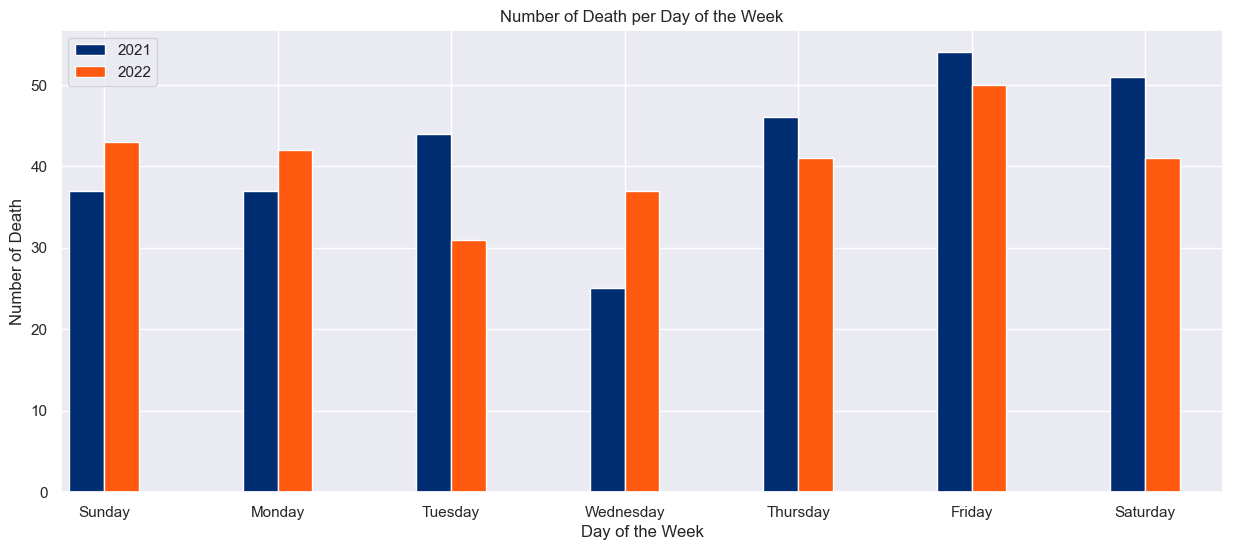

In [31]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022deathday.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Death')
plt.title('Number of Death per Day of the Week')
plt.legend()
plt.show()

##### **Fatality Rate per Day**

In [32]:
crash_data_pivot = pd.pivot_table(mvc2022, index='CRASH YEAR', columns='CRASH DoW', values=['CRASH DATE', 'NUMBER OF PERSONS KILLED'], aggfunc={'CRASH DATE': 'count', 'NUMBER OF PERSONS KILLED': 'sum'})
crash_data_pivot
fatality_rateday = (crash_data_pivot['NUMBER OF PERSONS KILLED'] / crash_data_pivot['CRASH DATE'])*100
fatality_rateday

CRASH DoW,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
CRASH YEAR,,,,,,,
2021,0.308942,0.237682,0.325442,0.258922,0.286159,0.280755,0.158308
2022,0.304915,0.292846,0.271146,0.317320,0.272461,0.213410,0.250372


### **9. Number Death per Hour of the Day**
##### In 2021, Midnight had the most death at 21 while at 4pm had the least amount of death at 3.
##### In 2022, 6pm had the most death at 20 while at 9am had the least amount of death at 5.


In [33]:
mvc2022deathhour=mvc2022.pivot_table(index= ['CRASH YEAR'],columns='CRASH HOUR', values='NUMBER OF PERSONS KILLED', aggfunc='sum')
pd.set_option('display.max_columns', None)
mvc2022deathhour

CRASH HOUR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
CRASH YEAR,,,,,,,,,,,,,,,,,,,,,,,,
2021,21.0,14.0,12.0,15.0,14.0,8.0,14.0,4.0,13.0,10.0,14.0,4.0,11.0,17.0,11.0,7.0,3.0,12.0,10.0,17.0,16.0,9.0,18.0,20.0
2022,13.0,13.0,16.0,11.0,17.0,12.0,9.0,8.0,8.0,5.0,9.0,14.0,6.0,10.0,13.0,12.0,11.0,11.0,20.0,16.0,8.0,14.0,16.0,13.0


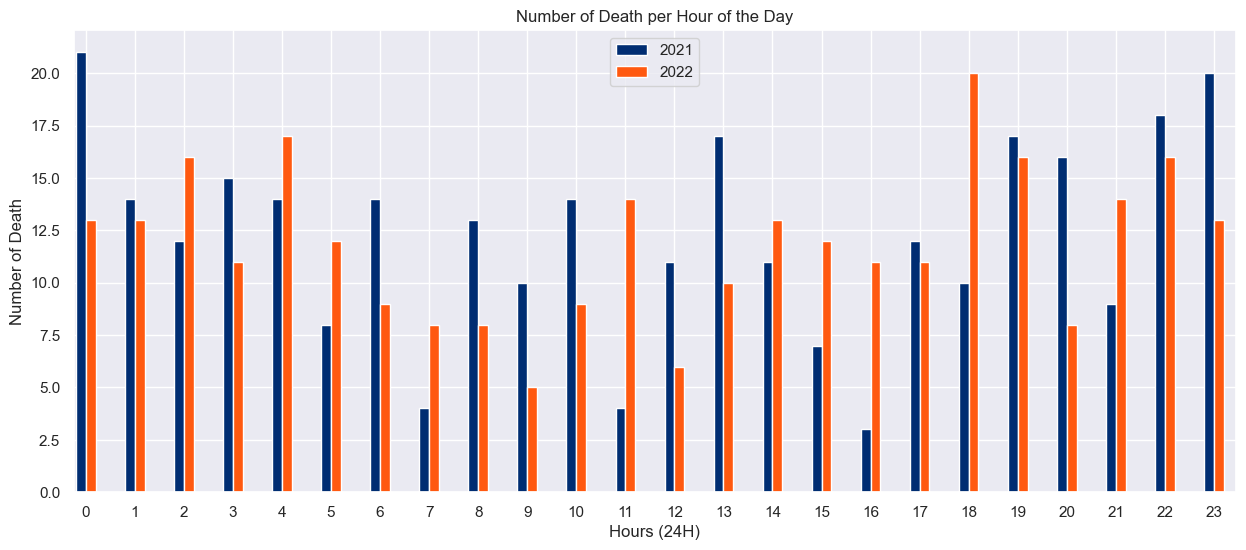

In [34]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022deathhour.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Hours (24H)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Death')
plt.title('Number of Death per Hour of the Day')
plt.legend()
plt.show()

##### **Fatality Rate over the Hours of the Day**

In [35]:
crash_data_pivot = pd.pivot_table(mvc2022, index='CRASH YEAR', columns='CRASH HOUR', values=['CRASH DATE', 'NUMBER OF PERSONS KILLED'], aggfunc={'CRASH DATE': 'count', 'NUMBER OF PERSONS KILLED': 'sum'})
crash_data_pivot
fatality_ratehour = (crash_data_pivot['NUMBER OF PERSONS KILLED'] / crash_data_pivot['CRASH DATE'])*100
fatality_ratehour



CRASH HOUR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
CRASH YEAR,,,,,,,,,,,,,,,,,,,,,,,,
2021,0.411442,0.515274,0.568182,0.825991,0.755532,0.395844,0.497689,0.114025,0.254304,0.205550,0.290517,0.075629,0.194518,0.288527,0.165513,0.103123,0.041970,0.170794,0.156986,0.306915,0.327600,0.202885,0.422436,0.516529
2022,0.280535,0.528455,0.757576,0.538160,0.765077,0.555813,0.313043,0.214075,0.144092,0.106815,0.195737,0.297936,0.118577,0.198098,0.219409,0.186974,0.170675,0.168557,0.337781,0.319553,0.185228,0.355240,0.418410,0.365477


## **Injured by the Numbers**

### **10. Number of Injured per Year**

In [36]:
mvc2022injureyear=mvc2022.pivot_table(index= 'CRASH YEAR', values = 'NUMBER OF PERSONS INJURED', aggfunc = ('sum'))
mvc2022injureyear

,NUMBER OF PERSONS INJURED
CRASH YEAR,
2021,51780.0
2022,51886.0


### **11. Number of Injured for Each Month**
##### In 2021, between May and October months amount of injuries was close to 5000 each month while the lowest was Feburary with 2555.
##### In 2022 between May and August month amount of injuries was close to 5000 each month while the lowest was January a 3201.

In [37]:
mvc2022injuremonth=mvc2022.pivot_table(index= ['CRASH YEAR'],columns='CRASH MONTH', values='NUMBER OF PERSONS INJURED', aggfunc='sum')
mvc2022injuremonth = mvc2022injuremonth.reindex(columns=month_order)
mvc2022injuremonth

CRASH MONTH,January,February,March,April,May,June,July,August,September,October,November,December
CRASH YEAR,,,,,,,,,,,,
2021,3124.0,2555.0,3526.0,4097.0,5040.0,5086.0,4829.0,4912.0,4977.0,5029.0,4505.0,4100.0
2022,3201.0,3333.0,4204.0,4152.0,4707.0,4985.0,4875.0,4881.0,4555.0,4530.0,4197.0,4266.0


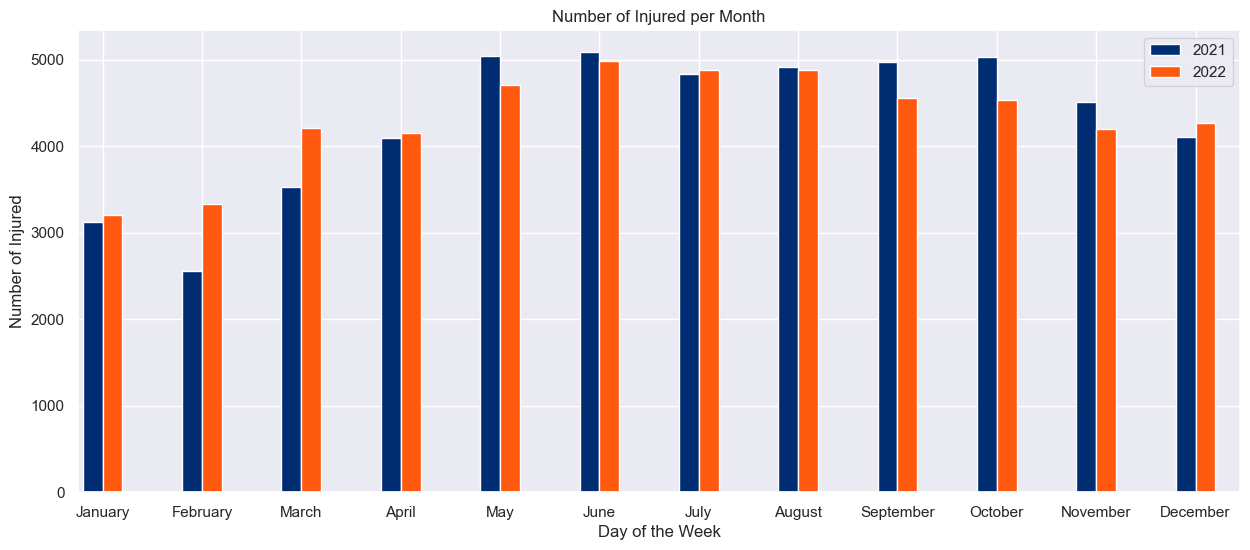

In [38]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022injuremonth.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Injured')
plt.title('Number of Injured per Month')
plt.legend()
plt.show()

### **12. Number of Injured for Days of the Week**
##### In both years Friday had the most injuries at 7892 and 8110, respectively
##### In 2021 Mondays had the least amount of injuries at 7027 while 2022 it was Sunday at 6891.

In [39]:
mvc2022injureday=mvc2022.pivot_table(index= ['CRASH YEAR'],columns='CRASH DoW', values='NUMBER OF PERSONS INJURED', aggfunc='sum')
mvc2022injureday = mvc2022injureday.reindex(columns=dow_order)
mvc2022injureday

CRASH DoW,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
CRASH YEAR,,,,,,,
2021,7241.0,7027.0,7326.0,7286.0,7329.0,7892.0,7679.0
2022,6891.0,7005.0,7167.0,7593.0,7545.0,8110.0,7575.0


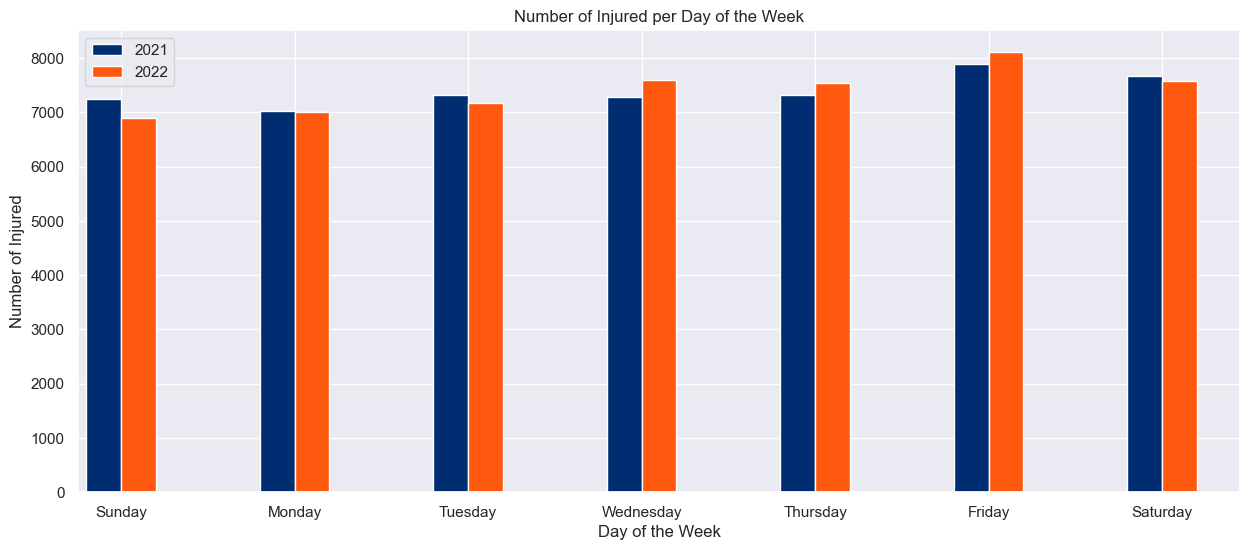

In [40]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022injureday.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Injured')
plt.title('Number of Injured per Day of the Week')
plt.legend()
plt.show()

### **13. Number of Injured for each Hour of the Day**
##### In 2021 at 5pm had the most injuries at 3397 while at 4am had the least injuries at 824.
##### In 2022 at 3pm had the most injuries at 3483 while at 2am had the least injuries at 953.

In [41]:
mvc2022injurehour=mvc2022.pivot_table(index= ['CRASH YEAR'],columns='CRASH HOUR', values='NUMBER OF PERSONS INJURED', aggfunc='sum')
mvc2022injurehour

CRASH HOUR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
CRASH YEAR,,,,,,,,,,,,,,,,,,,,,,,,
2021,2487.0,1309.0,1003.0,874.0,824.0,874.0,1082.0,1465.0,1957.0,1921.0,1688.0,2222.0,2436.0,2681.0,3074.0,3221.0,3299.0,3397.0,3212.0,2875.0,2662.0,2545.0,2499.0,2173.0
2022,2321.0,1214.0,953.0,961.0,1074.0,883.0,1230.0,1712.0,2542.0,1893.0,1869.0,2126.0,2309.0,2424.0,3026.0,3483.0,3367.0,3447.0,3216.0,2704.0,2500.0,2443.0,2259.0,1930.0


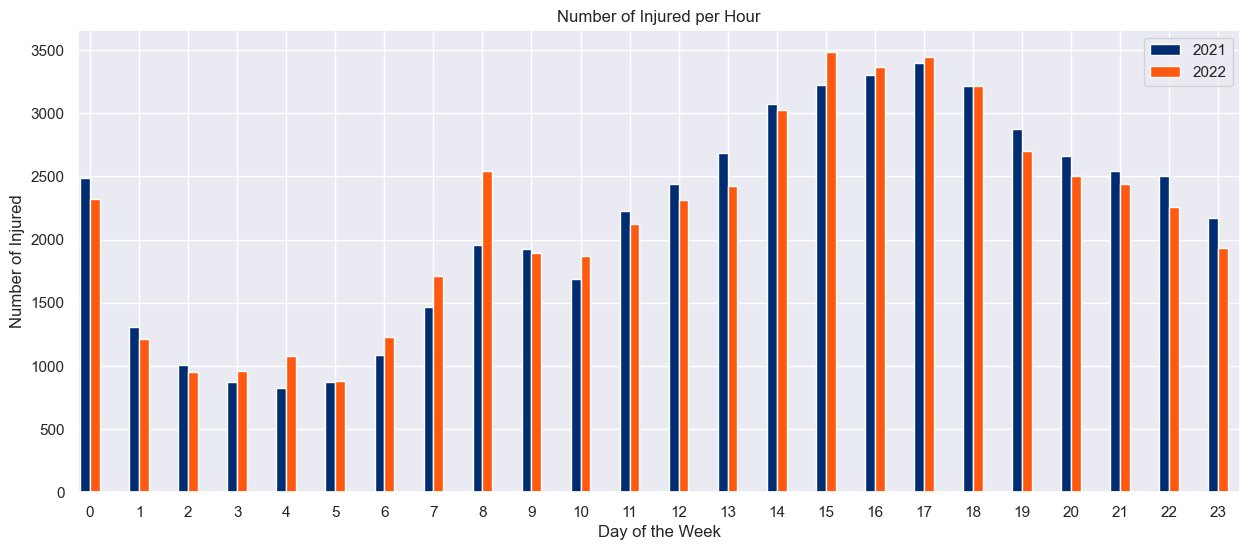

In [42]:
sns.set(rc={'figure.figsize': (15,6)})
fig, ax = plt.subplots()
mvcpivot_filtered = mvc2022injurehour.loc[[2021, 2022]]
mvcpivot_filtered.loc[2021].plot(kind='bar', color='#002D72', ax=ax, position=1, width=0.2)
mvcpivot_filtered.loc[2022].plot(kind='bar', color='#FF5910', ax=ax, position=0, width=0.2)
plt.xlabel('Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Injured')
plt.title('Number of Injured per Hour')
plt.legend()
plt.show()

## **Map of NYC Crashes**
##### Needed to use clean data set with Latitude and Longitute to map the location of the crashes
##### 20460 rows of data was removed

In [43]:
mvc2022clean = mvc2022.dropna(subset=['LATITUDE','LONGITUDE', 'LOCATION']) \
                      .loc[(mvc2022.LATITUDE != 0.0) & (mvc2022.LONGITUDE != 0.0)]
mvc2022clean

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CRASH HOUR,CRASH MONTH,CRASH DoW,CRASH YEAR
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,Unspecified,9,September,Saturday,2021
4,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,NaN,8,December,Tuesday,2021
6,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,Passing Too Closely,17,December,Tuesday,2021
7,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,2.0,0.0,0,Unspecified,8,December,Tuesday,2021
8,2021-12-14,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,0.0,0.0,0,Driver Inexperience,21,December,Tuesday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975605,2022-12-20,10:50,QUEENS,11433.0,40.703796,-73.797650,"(40.703796, -73.79765)",NaN,NaN,92-31 UNION HALL STREET,0.0,0.0,0,Driver Inattention/Distraction,10,December,Tuesday,2022
1976363,2022-12-03,14:35,NaN,NaN,40.712223,-73.806500,"(40.712223, -73.8065)",PARSONS BOULEVARD,85 AVENUE,NaN,0.0,0.0,0,Unspecified,14,December,Saturday,2022
1976700,2022-03-18,0:25,NaN,NaN,40.845222,-73.866130,"(40.845222, -73.86613)",WHITE PLAINS ROAD,NaN,NaN,0.0,0.0,0,Turning Improperly,0,March,Friday,2022
1976871,2022-03-19,8:30,BROOKLYN,11234.0,40.621857,-73.915596,"(40.621857, -73.915596)",NaN,NaN,1325 EAST 66 STREET,0.0,0.0,0,Driverless/Runaway Vehicle,8,March,Saturday,2022


In [44]:
mvc2022clean['CRASH DATE'] = mvc2022clean['CRASH DATE'].astype(str)
mvc2022.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CRASH HOUR                                int64
CRASH MONTH                              object
CRASH DoW                                object
CRASH YEAR                                int32
dtype: object

In [ ]:
NYCMap3 = folium.Map(location=[40.75, -73.866667], zoom_start=12)
marker_cluster = MarkerCluster().add_to(NYCMap3)
for index, row in mvc2022clean.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']],
                 popup=[row['CRASH DoW'],row['CRASH TIME'], row['CRASH DATE'], row['LATITUDE'], row['LONGITUDE'], row['CONTRIBUTING FACTOR VEHICLE 1']]).add_to(marker_cluster)
NYCMap3

#popup=[row['CRASH DoW'],row['CRASH TIME'], row['CRASH DATE'],row['CONTRIBUTING FACTOR VEHICLE 1']]).add_to(marker_cluster)

## **Conclusion**

1. Avoid intersections in NYC. Most accidents occurs at intersections
2. Avoid driving on Friday and during afternoon hours
2. If the MV104 form was filled out by New York Police Department properly we can get more accurate infomation.
2. The data is preliminary and subject to change when the MV-104AN forms are amended based on revised crash details. The data set is updated daily. 
3. Not all accidents are reported because the parties might not want to get the police or their insurance involved.


## **Opportunites and Next Steps**
1. Looking at injury and fatality rates.
2. Looking at the possible reason for the accidents in areas that have the highest numbers of accidents. 
3. Populate the data if the report doesn't have zip code, borough, longitude and latitude but has address or cross street.
4. Looking at dataset over 10 years and see if number of incidents, injuries and death increase or decrease. 
5. Comparing numbers 2018-2019(Pre-Covid), 2020-2022(Covid), 2023-202X(Post-Covid)
6. Create a heatmap over time using Folium Heatmap with Time
7. Looking at only one borough specifically 


In [ ]:
mvc2022clean.to_csv('Data/mvc2022clean.csv')

###### Scrap notebook of codes

In [ ]:
'''heatmap_data = mvc2022clean[['LATITUDE', 'LONGITUDE']]
heatmap_data = heatmap_data.values.tolist()
NYCMap = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
HeatMap(heatmap_data).add_to(NYCMap)
NYCMap'''

In [ ]:
'''


NYCMapcombine = folium.Map(location=[40.75, -73.866667], zoom_start=12)


marker_cluster = MarkerCluster().add_to(NYCMapcombine)


heat_data = []
for index, row in mvc2022.iterrows():
    heat_data.append([row['LATITUDE'], row['LONGITUDE']])
    folium.Marker([row['LATITUDE'], row['LONGITUDE']],
                 popup=[row['CRASH DoW'],row['CRASH TIME'], row['CRASH DATE'], row['CONTRIBUTING FACTOR VEHICLE 1']]).add_to(marker_cluster)

HeatMap(heat_data).add_to(NYCMapcombine)


NYCMapcombine
'''